In [1]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import numpy as np

In [2]:
# Parameters
mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path = None #'~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= 3
which_mode= 'transects_clim'

#_____________________________________________________________________________________
input_paths= list()
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.3/')

input_names= list()
input_names.append('TKE, ck=0.1')
input_names.append('TKE, ck=0.3')
input_names.append('TKE+IDEMIX, ck=0.1, jayne (old param)')
input_names.append('TKE+IDEMIX, ck=0.1, jayne (new param)')
input_names.append('TKE+IDEMIX, ck=0.1, nycander (new param)')
input_names.append('TKE+IDEMIX, ck=0.1, stormtide (new param)')
input_names.append('TKE+IDEMIX, ck=0.3, jayne (new param)')
input_names.append('TKE+IDEMIX, ck=0.3, nycander (new param)')
input_names.append('TKE+IDEMIX, ck=0.3, stormtide (new param)')

vname     = 'salt'
year      = [1979,2019]
mon, day, record, box, depth = None, None, None, None, None

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None # '/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None # 'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
input_transect = list()
input_transect.append([[-30, -30],[-80, 40], 'Transect: -30°W, -80°S-40°N'])

#_____________________________________________________________________________________
which_clim= 'phc3'
clim_path = '/work/ollie/pscholz/INIT_HYDRO/phc3.0/phc3.0_annual.nc'

#_____________________________________________________________________________________
cstr      = 'blue2red'
cnum      = 20
cref      = 0
crange, cmin, cmax, cfac, climit = None, None, None, None, None

#_____________________________________________________________________________________
ncolumn   = 3 
do_rescale= None
which_dpi = 300
which_res = 0.5
do_ylog   = True
do_contour= True

In [3]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

#______________________________________________________________________________________________________
if which_cycl is not None: 
    for ii,ipath in enumerate(input_paths):
        input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
        print(ii, input_paths[ii])
    
    if ref_path is not None:
        ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
        print('R', ref_path)

#______________________________________________________________________________________________________        
cinfo=dict({'cstr':cstr, 'cnum':cnum}) 
if crange   is not None: cinfo['crange']=crange
if cmin     is not None: cinfo['cmin'  ]=cmin
if cmax     is not None: cinfo['cmax'  ]=cmax
if cref     is not None: cinfo['cref'  ]=cref
if cfac     is not None: cinfo['cfac'  ]=cfac  
if climit   is not None: cinfo['climit']=climit     
if ref_path is not None: cinfo['cref'  ]=0.0    

#______________________________________________________________________________________________________
# in case of diff plots
if ref_path is not None:
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record

#______________________________________________________________________________________________________    
transects = tpv.analyse_transects(input_transect, which_res='res', res=which_res)

 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
0 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/3/
1 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/3/
2 /home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/3/
3 /home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/3/
4 /home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.1/3/
5 /home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_

In [4]:
#___LOAD CLIMATOLOGY_____________________________________________________________________________________
clim_vname= vname
if vname in ['temp', 'salt', 'pdens'] or 'sigma' in vname: 
    if   vname=='temp' and  which_clim.lower()=='woa18': clim_vname = 't00an1'
    elif vname=='salt' and  which_clim.lower()=='woa18': clim_vname = 's00an1'
    clim          = tpv.load_climatology(mesh, clim_path, clim_vname)
    clim_transect = tpv.load_transect_fesom2(mesh, clim, transects)
    del clim
else: raise ValueError('climatology not supported for choosen vname')   

#___LOAD FESOM2 REFERENCE DATA________________________________________________________________________
list_transects = list()
if ref_path is not None:
    print(ref_path)
    data_ref = tpv.load_data_fesom2(mesh, ref_path, vname=vname, year=ref_year, mon=ref_mon, descript=ref_name, do_info=False) 
    data_ref_transects = tpv.load_transect_fesom2(mesh, data_ref, transects, do_compute=True)
    data_ref_transects = tpv.do_transectanomaly(data_ref_transects, clim_transect)
    list_transects.append(data_ref_transects)
    del(data_ref, data_ref_transects)
    
#___LOAD FESOM2 DATA___________________________________________________________________________________
for datapath, descript in zip(input_paths, input_names):
    print(datapath, descript)
    data           = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, descript=descript , do_info=False)
    data_transects = tpv.load_transect_fesom2(mesh, data, transects, do_compute=True)
    data_transects = tpv.do_transectanomaly(data_transects, clim_transect)
    list_transects.append(data_transects)
del(data, data_transects, clim_transect)

/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/3/ TKE, ck=0.1
/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/3/ TKE, ck=0.3
/home/ollie/pscholz/results/trr181_tke+idemix_orig_ck0.1/3/ TKE+IDEMIX, ck=0.1, jayne (old param)
/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/3/ TKE+IDEMIX, ck=0.1, jayne (new param)
/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.1/3/ TKE+IDEMIX, ck=0.1, nycander (new param)
/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.1/3/ TKE+IDEMIX, ck=0.1, stormtide (new param)
/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/3/ TKE+IDEMIX, ck=0.3, jayne (new param)
/home/ollie/pscholz/results/old_trr181_tke+idemix_nycander05_ck0.3/3/ TKE+IDEMIX, ck=0.3, nycander (new param)
/home/ollie/pscholz/results/old_trr181_tke+idemix_stormtide2_ck0.3/3/ TKE+IDEMIX, ck=0.3, stormtide (new param)


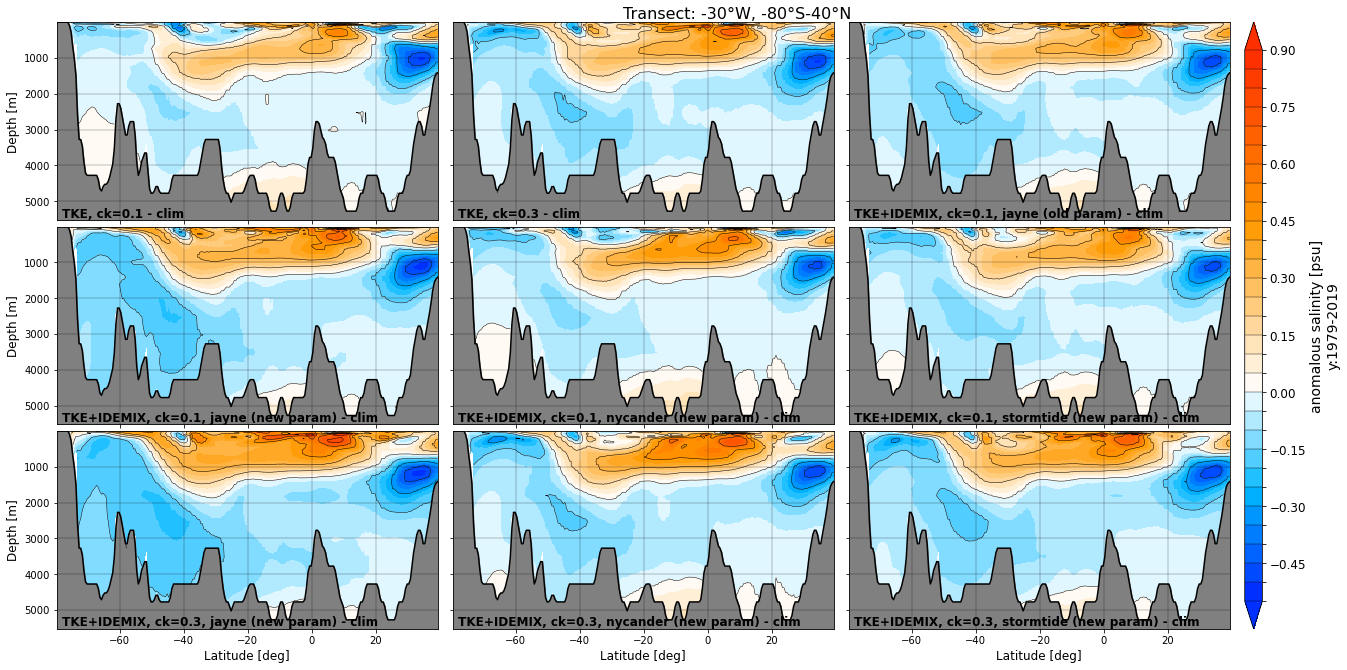

 > save figure: /home/ollie/pscholz/figures/test_papermill/transects_clim_salt_transect:_-30°w,_-80°s-40°n_y1979-2019.png


In [5]:
#___PLOT FESOM2 DATA___________________________________________________________________________________
spath  = save_path
sname  = vname
slabel = list_transects[0][0][sname].attrs['str_lsave']
strans = list_transects[0][0][vname].attrs['transect_name'].replace(' ','_').lower()
if spath is not None: spath  = '{}/{}_{}_{}_{}.png'.format(spath, which_mode, sname, strans, slabel) 
nrow   = np.ceil(len(list_transects)/ncolumn).astype('int')
if save_fname is not None: spath = save_fname
fig, ax, cbar = tpv.plot_transects(list_transects, transects, cinfo=cinfo, figsize=[ncolumn*7, nrow*3.5], n_rc=[nrow, ncolumn], 
                                pos_gap=[0.01, 0.01], pos_extend=[0.05, 0.08, 0.97,0.95], do_ylog=do_ylog, do_contour=do_contour, 
                                do_save = spath, save_dpi=which_dpi )